In [ ]:
# A1) Upload kaggle.json (Kaggle → Account → Create New API Token)
from google.colab import files
files.upload()  # choose kaggle.json

# A2) Install Kaggle CLI and place credentials
!pip -q install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Sanity check
!kaggle --version


Saving kaggle.json to kaggle.json
Kaggle API 1.7.4.5


In [ ]:
# Create a target folder and download there
!mkdir -p /content/fer2013plus
!kaggle datasets download -d subhaditya/fer2013plus -p /content/fer2013plus --unzip

# Inspect the contents
!ls -lah /content/fer2013plus


Dataset URL: https://www.kaggle.com/datasets/subhaditya/fer2013plus
License(s): unknown
  0% 0.00/132M [00:00<?, ?B/s]
100% 132M/132M [00:00<00:00, 1.63GB/s]
total 16K
drwxr-xr-x 3 root root 4.0K Oct 14 15:30 .
drwxr-xr-x 1 root root 4.0K Oct 14 15:30 ..
drwxr-xr-x 3 root root 4.0K Oct 14 15:30 fer2013plus
-rw-r--r-- 1 root root 1.8K Oct 14 15:30 ferplus_port.py


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Colab paths (primary) ---
base_path = "/content/fer2013plus/fer2013plus/fer2013"
train_path = os.path.join(base_path, "train")
test_path  = os.path.join(base_path, "test")

# Fallback to /content/fer2013plus if needed
if not (os.path.isdir(train_path) and os.path.isdir(test_path)):
    base_path = "/content/fer2013plus"
    train_path = os.path.join(base_path, "train")
    test_path  = os.path.join(base_path, "test")

assert os.path.isdir(train_path) and os.path.isdir(test_path), \
    f"Couldn't find train/test under {base_path}. Check your folders."

img_size   = (224, 224)
batch_size = 64

# Train (with augmentation) + virtual 20% validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Test (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_gen = train_datagen.flow_from_directory(
    train_path, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', subset='training', shuffle=True, seed=1337
)

val_gen = train_datagen.flow_from_directory(
    train_path, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', subset='validation', shuffle=False, seed=1337
)

test_gen = test_datagen.flow_from_directory(
    test_path, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', shuffle=False
)

print("Classes:", train_gen.class_indices)


Found 22712 images belonging to 8 classes.
Found 5674 images belonging to 8 classes.
Found 7099 images belonging to 8 classes.
Classes: {'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happiness': 4, 'neutral': 5, 'sadness': 6, 'surprise': 7}


Train dir: /content/fer2013plus/fer2013plus/fer2013/train
Test  dir: /content/fer2013plus/fer2013plus/fer2013/test
Device: cuda | Mixed precision: True
Classes: ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'] | num_classes: 8
Split sizes -> train: 22708 | val: 5678 | test: 7099


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Total parameters: 85,804,808 | Trainable: 85,804,808
Starting training...


/tmp/ipython-input-3828044741.py:138: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=amp_enabled)
/tmp/ipython-input-3828044741.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=amp_enabled):


Epoch 01/40 | Train Loss 1.7274 Acc 36.38% | Val Loss 1.5664 Acc 47.76% | LR 0.000021
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 02/40 | Train Loss 1.1060 Acc 70.76% | Val Loss 0.9261 Acc 79.08% | LR 0.000041
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 03/40 | Train Loss 0.9346 Acc 78.32% | Val Loss 0.8870 Acc 80.68% | LR 0.000060
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 04/40 | Train Loss 0.8713 Acc 81.16% | Val Loss 0.8544 Acc 82.23% | LR 0.000080
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 05/40 | Train Loss 0.8386 Acc 82.64% | Val Loss 0.8712 Acc 81.58% | LR 0.000051
Epoch 06/40 | Train Loss 0.7444 Acc 87.08% | Val Loss 0.8428 Acc 83.57% | LR 0.000035
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 07/40 | Train Loss 0.6860 Acc 90.18% | Val Loss 0.8218 Acc 84.77% | LR 0.000021
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 08/40 | Train Loss 0.6363 Acc 92.70% | Val Loss 0.8312 Acc 84.57% | LR 0.000010
Epoch 09/40 | Train Loss 0.6057 Acc 

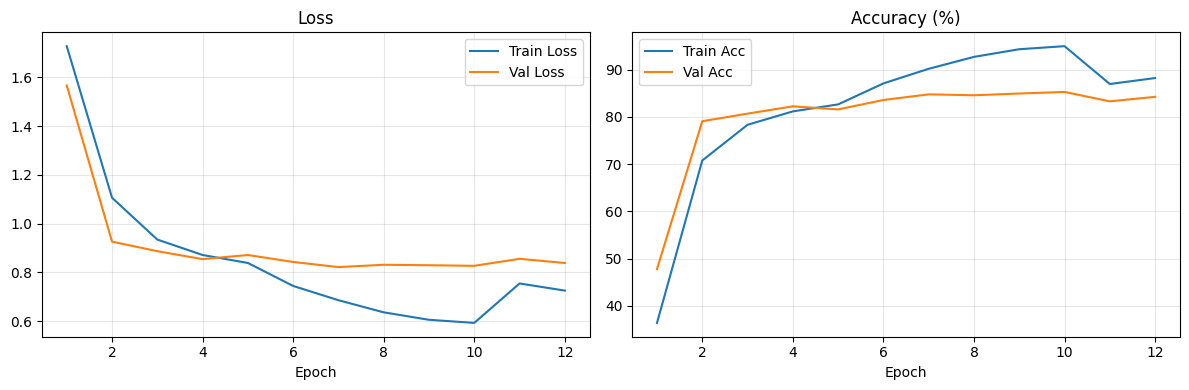


TEST | Loss 0.8282 | Acc 83.98%

Classification Report:
              precision    recall  f1-score   support

       anger     0.8177    0.7593    0.7874       644
    contempt     0.7500    0.2353    0.3582        51
     disgust     0.8065    0.4386    0.5682        57
        fear     0.8471    0.4311    0.5714       167
   happiness     0.9361    0.9135    0.9247      1827
     neutral     0.8109    0.9134    0.8591      2597
     sadness     0.7407    0.6075    0.6675       856
    surprise     0.8373    0.8922    0.8639       900

    accuracy                         0.8398      7099
   macro avg     0.8183    0.6489    0.7001      7099
weighted avg     0.8390    0.8398    0.8343      7099



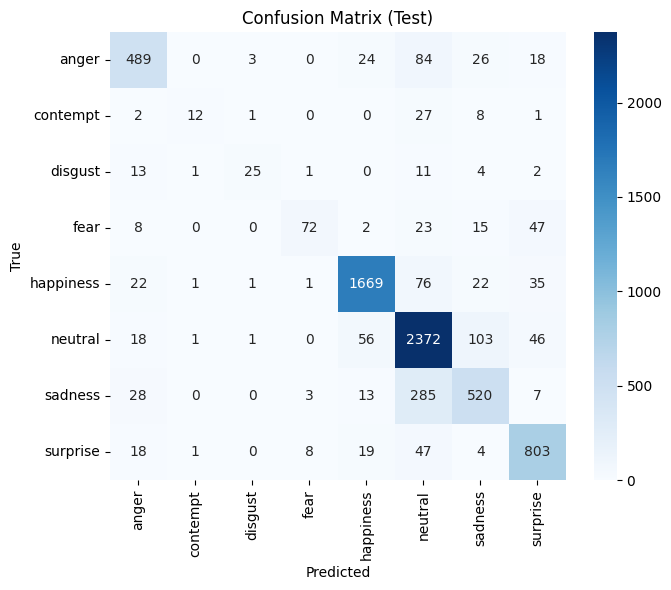

TypeError: Object of type Tensor is not JSON serializable

In [ ]:
# ============================================================
# DeiT-Base (timm) on FERPlus with Train/Val/Test
# - Robust path handling (primary + fallback)
# - Stratified train/val split from TRAIN folder (e.g., 80/20)
# - Test folder kept untouched for final evaluation
# - ImageNet normalization, AutoAugment, RandomErasing
# - Mixed precision (autocast + GradScaler)
# - Cosine LR schedule, early stopping
# - Saves best checkpoint with useful metadata
# ============================================================

import os, json, math, random, time
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from torchvision.datasets import ImageFolder

import timm
from timm.scheduler import CosineLRScheduler

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# -------------------- Reproducibility --------------------
SEED = 1337
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.benchmark = True  # speed; set False for fully deterministic but slower

# -------------------- Paths (primary + fallback) --------------------
# Primary
base_primary = "/content/fer2013plus/fer2013plus/fer2013"
train_dir = os.path.join(base_primary, "train")
test_dir  = os.path.join(base_primary, "test")

# Fallback
if not (os.path.isdir(train_dir) and os.path.isdir(test_dir)):
    base_fallback = "/content/fer2013plus"
    train_dir = os.path.join(base_fallback, "train")
    test_dir  = os.path.join(base_fallback, "test")

assert os.path.isdir(train_dir) and os.path.isdir(test_dir), f"Couldn't find train/test under {os.path.dirname(train_dir)}"

print("Train dir:", train_dir)
print("Test  dir:", test_dir)

# -------------------- Device --------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
amp_enabled = torch.cuda.is_available()  # mixed precision on GPU
print("Device:", device, "| Mixed precision:", amp_enabled)

# -------------------- Config --------------------
img_size   = 224
batch_size = 64
epochs     = 40
val_ratio  = 0.20      # 20% of TRAIN becomes validation
patience   = 5         # early stopping patience
num_workers = 4 if torch.cuda.is_available() else 2

# -------------------- Transforms --------------------
# Use ImageNet stats because we're fine-tuning a model pretrained on ImageNet
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD  = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
    transforms.RandomErasing(p=0.2)
])

eval_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

# -------------------- Build ImageFolder once for TRAIN (to get targets) --------------------
full_train = ImageFolder(train_dir, transform=train_transform)   # transform will be overridden by Subset + different dataset below when needed
class_names = full_train.classes
num_classes = len(class_names)
print("Classes:", class_names, "| num_classes:", num_classes)

# Collect labels for stratified split
targets = np.array([y for _, y in full_train.samples])  # labels from file paths

# Stratified train/val split (indices on TRAIN folder)
sss = StratifiedShuffleSplit(n_splits=1, test_size=val_ratio, random_state=SEED)
train_idx, val_idx = next(sss.split(np.zeros(len(targets)), targets))

# Build two datasets with proper transforms
train_ds = ImageFolder(train_dir, transform=train_transform)
val_ds   = ImageFolder(train_dir, transform=eval_transform)  # validation drawn from TRAIN dir
test_ds  = ImageFolder(test_dir, transform=eval_transform)   # final test set untouched

train_subset = Subset(train_ds, train_idx)
val_subset   = Subset(val_ds,   val_idx)

# -------------------- Loaders --------------------
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, pin_memory=True)
val_loader   = DataLoader(val_subset,   batch_size=batch_size, shuffle=False,
                          num_workers=num_workers, pin_memory=True)
test_loader  = DataLoader(test_ds,      batch_size=batch_size, shuffle=False,
                          num_workers=num_workers, pin_memory=True)

print(f"Split sizes -> train: {len(train_subset)} | val: {len(val_subset)} | test: {len(test_ds)}")

# -------------------- Model --------------------
model = timm.create_model('deit_base_patch16_224', pretrained=True, num_classes=num_classes)
model = model.to(device)

# Count params
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,} | Trainable: {trainable_params:,}")

# -------------------- Optimizer / Loss / Scheduler --------------------
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Cosine LR schedule with warmup & restarts
lr_scheduler = CosineLRScheduler(
    optimizer,
    t_initial=10,         # epochs per cosine cycle
    lr_min=1e-6,
    warmup_lr_init=1e-6,
    warmup_t=5,           # warmup epochs
    cycle_limit=5,
)

scaler = torch.cuda.amp.GradScaler(enabled=amp_enabled)

# -------------------- Train / Eval helpers --------------------
def run_epoch(loader, train_mode=True):
    if train_mode:
        model.train()
    else:
        model.eval()

    total_loss = 0.0
    correct = 0
    total   = 0

    all_preds, all_labels = [], []

    for imgs, labels in loader:
        imgs, labels = imgs.to(device, non_blocking=True), labels.to(device, non_blocking=True)

        with torch.cuda.amp.autocast(enabled=amp_enabled):
            outputs = model(imgs)
            loss = criterion(outputs, labels)

        if train_mode:
            optimizer.zero_grad(set_to_none=True)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

        total_loss += loss.item() * imgs.size(0)
        preds = outputs.argmax(1)
        correct += (preds == labels).sum().item()
        total   += labels.size(0)

        all_preds.append(preds.detach().cpu().numpy())
        all_labels.append(labels.detach().cpu().numpy())

    avg_loss = total_loss / max(1, total)
    acc = 100.0 * correct / max(1, total)
    all_preds  = np.concatenate(all_preds) if all_preds else np.array([])
    all_labels = np.concatenate(all_labels) if all_labels else np.array([])

    return avg_loss, acc, all_preds, all_labels

# -------------------- Training loop with early stopping --------------------
best_val = float('inf')
best_state = None
best_epoch = -1
wait = 0

train_losses, val_losses, train_accs, val_accs, lrs = [], [], [], [], []

print("Starting training...")
for epoch in range(1, epochs+1):
    # Train
    tr_loss, tr_acc, _, _ = run_epoch(train_loader, train_mode=True)

    # Step scheduler at epoch granularity
    lr_scheduler.step(epoch)
    current_lr = optimizer.param_groups[0]['lr']

    # Validate
    va_loss, va_acc, vp, vl = run_epoch(val_loader, train_mode=False)

    train_losses.append(tr_loss); val_losses.append(va_loss)
    train_accs.append(tr_acc);    val_accs.append(va_acc)
    lrs.append(current_lr)

    print(f"Epoch {epoch:02d}/{epochs} | "
          f"Train Loss {tr_loss:.4f} Acc {tr_acc:.2f}% | "
          f"Val Loss {va_loss:.4f} Acc {va_acc:.2f}% | "
          f"LR {current_lr:.6f}")

    # Early stopping on validation loss
    if va_loss < best_val - 1e-4:
        best_val = va_loss
        best_epoch = epoch
        wait = 0
        best_state = {
            "epoch": epoch,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "scheduler_state_dict": lr_scheduler.state_dict(),
            "class_names": class_names,
            "img_size": img_size,
            "imagenet_mean": IMAGENET_MEAN,
            "imagenet_std": IMAGENET_STD,
        }
        torch.save(best_state, "deit_best.ckpt")
        print("✓ Saved new best checkpoint -> deit_best.ckpt")
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered. Restoring best weights from epoch", best_epoch)
            break

# Restore best model before testing
if best_state is not None:
    model.load_state_dict(best_state["model_state_dict"])

# -------------------- Plots --------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
epochs_range = range(1, len(train_losses)+1)
ax1.plot(epochs_range, train_losses, label="Train Loss")
ax1.plot(epochs_range, val_losses,   label="Val Loss")
ax1.set_title("Loss"); ax1.set_xlabel("Epoch"); ax1.legend(); ax1.grid(alpha=0.3)

ax2.plot(epochs_range, train_accs, label="Train Acc")
ax2.plot(epochs_range, val_accs,   label="Val Acc")
ax2.set_title("Accuracy (%)"); ax2.set_xlabel("Epoch"); ax2.legend(); ax2.grid(alpha=0.3)
plt.tight_layout(); plt.show()

# -------------------- Final Test Eval --------------------
test_loss, test_acc, y_pred, y_true = run_epoch(test_loader, train_mode=False)
print(f"\nTEST | Loss {test_loss:.4f} | Acc {test_acc:.2f}%")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Confusion matrix (optional)
try:
    import seaborn as sns
    cm = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)))
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.title("Confusion Matrix (Test)"); plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout(); plt.show()
except Exception as e:
    print("CM plot skipped:", e)

# -------------------- Save minimal inference bundle --------------------
# Save the model state dict separately
torch.save(model.state_dict(), "deit_inference_model_state.pth")

# Save the rest of the metadata to a JSON file
bundle_meta = {
    "class_names": class_names,
    "img_size": img_size,
    "imagenet_mean": IMAGENET_MEAN,
    "imagenet_std": IMAGENET_STD,
}
with open("deit_inference_meta.json", "w") as f:
    json.dump(bundle_meta, f, indent=2)

print("\nSaved for inference:")
print(" - deit_best.ckpt   (training checkpoint with optimizer/scheduler)")
print(" - deit_inference_model_state.pth (model state dict for inference)")
print(" - deit_inference_meta.json (minimal info: classes + preprocessing)")

Train dir: /content/fer2013plus/fer2013plus/fer2013/train
Test  dir: /content/fer2013plus/fer2013plus/fer2013/test
Device: cuda | Mixed precision: True
Classes: ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'] | num_classes: 8
Split sizes -> train: 22708 | val: 5678 | test: 7099
Total parameters: 85,804,808 | Trainable: 85,804,808
Starting training...


/tmp/ipython-input-1968255752.py:138: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=amp_enabled)
/tmp/ipython-input-1968255752.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=amp_enabled):


Epoch 01/40 | Train Loss 1.7274 Acc 36.38% | Val Loss 1.5664 Acc 47.76% | LR 0.000021
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 02/40 | Train Loss 1.1060 Acc 70.76% | Val Loss 0.9261 Acc 79.08% | LR 0.000041
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 03/40 | Train Loss 0.9346 Acc 78.32% | Val Loss 0.8870 Acc 80.68% | LR 0.000060
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 04/40 | Train Loss 0.8713 Acc 81.16% | Val Loss 0.8544 Acc 82.23% | LR 0.000080
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 05/40 | Train Loss 0.8386 Acc 82.64% | Val Loss 0.8712 Acc 81.58% | LR 0.000051
Epoch 06/40 | Train Loss 0.7444 Acc 87.08% | Val Loss 0.8428 Acc 83.57% | LR 0.000035
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 07/40 | Train Loss 0.6860 Acc 90.18% | Val Loss 0.8218 Acc 84.77% | LR 0.000021
✓ Saved new best checkpoint -> deit_best.ckpt
Epoch 08/40 | Train Loss 0.6363 Acc 92.70% | Val Loss 0.8312 Acc 84.57% | LR 0.000010
Epoch 09/40 | Train Loss 0.6057 Acc 

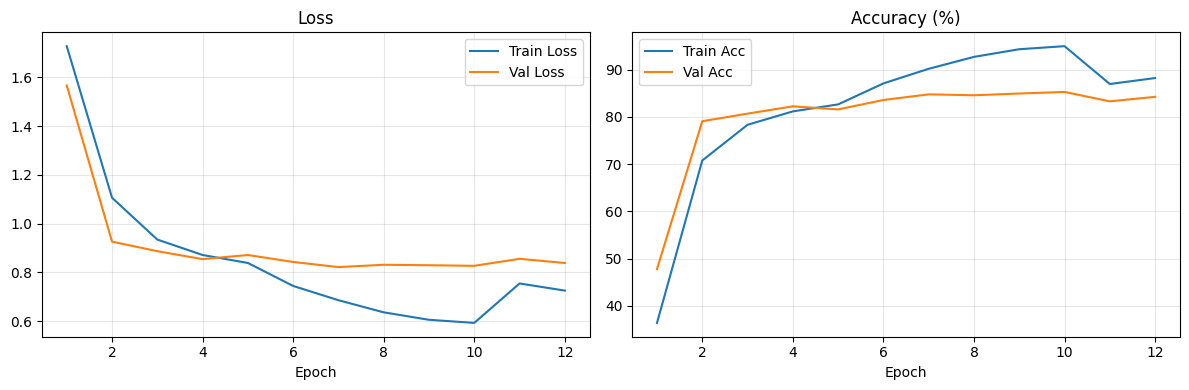


TEST | Loss 0.8282 | Acc 83.98%

Classification Report:
              precision    recall  f1-score   support

       anger     0.8177    0.7593    0.7874       644
    contempt     0.7500    0.2353    0.3582        51
     disgust     0.8065    0.4386    0.5682        57
        fear     0.8471    0.4311    0.5714       167
   happiness     0.9361    0.9135    0.9247      1827
     neutral     0.8109    0.9134    0.8591      2597
     sadness     0.7407    0.6075    0.6675       856
    surprise     0.8373    0.8922    0.8639       900

    accuracy                         0.8398      7099
   macro avg     0.8183    0.6489    0.7001      7099
weighted avg     0.8390    0.8398    0.8343      7099



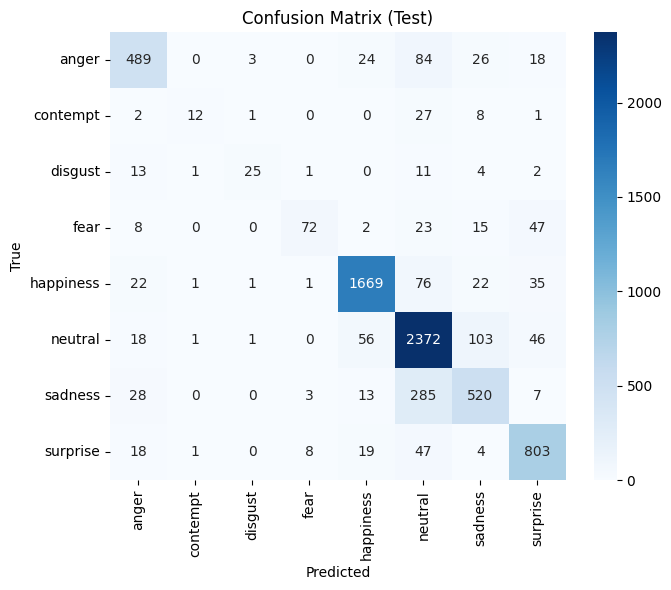


Saved for inference:
 - deit_best.ckpt   (training checkpoint with optimizer/scheduler)
 - deit_inference_model_state.pth (model state dict for inference)
 - deit_inference_meta.json (minimal info: classes + preprocessing)


In [ ]:
# ============================================================
# DeiT-Base (timm) on FERPlus with Train/Val/Test
# - Robust path handling (primary + fallback)
# - Stratified train/val split from TRAIN folder (e.g., 80/20)
# - Test folder kept untouched for final evaluation
# - ImageNet normalization, AutoAugment, RandomErasing
# - Mixed precision (autocast + GradScaler)
# - Cosine LR schedule, early stopping
# - Saves best checkpoint with useful metadata
# ============================================================

import os, json, math, random, time
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from torchvision.datasets import ImageFolder

import timm
from timm.scheduler import CosineLRScheduler

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# -------------------- Reproducibility --------------------
SEED = 1337
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.benchmark = True  # speed; set False for fully deterministic but slower

# -------------------- Paths (primary + fallback) --------------------
# Primary
base_primary = "/content/fer2013plus/fer2013plus/fer2013"
train_dir = os.path.join(base_primary, "train")
test_dir  = os.path.join(base_primary, "test")

# Fallback
if not (os.path.isdir(train_dir) and os.path.isdir(test_dir)):
    base_fallback = "/content/fer2013plus"
    train_dir = os.path.join(base_fallback, "train")
    test_dir  = os.path.join(base_fallback, "test")

assert os.path.isdir(train_dir) and os.path.isdir(test_dir), f"Couldn't find train/test under {os.path.dirname(train_dir)}"

print("Train dir:", train_dir)
print("Test  dir:", test_dir)

# -------------------- Device --------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
amp_enabled = torch.cuda.is_available()  # mixed precision on GPU
print("Device:", device, "| Mixed precision:", amp_enabled)

# -------------------- Config --------------------
img_size   = 224
batch_size = 64
epochs     = 40
val_ratio  = 0.20      # 20% of TRAIN becomes validation
patience   = 5         # early stopping patience
num_workers = 4 if torch.cuda.is_available() else 2

# -------------------- Transforms --------------------
# Use ImageNet stats because we're fine-tuning a model pretrained on ImageNet
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD  = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
    transforms.RandomErasing(p=0.2)
])

eval_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

# -------------------- Build ImageFolder once for TRAIN (to get targets) --------------------
full_train = ImageFolder(train_dir, transform=train_transform)   # transform will be overridden by Subset + different dataset below when needed
class_names = full_train.classes
num_classes = len(class_names)
print("Classes:", class_names, "| num_classes:", num_classes)

# Collect labels for stratified split
targets = np.array([y for _, y in full_train.samples])  # labels from file paths

# Stratified train/val split (indices on TRAIN folder)
sss = StratifiedShuffleSplit(n_splits=1, test_size=val_ratio, random_state=SEED)
train_idx, val_idx = next(sss.split(np.zeros(len(targets)), targets))

# Build two datasets with proper transforms
train_ds = ImageFolder(train_dir, transform=train_transform)
val_ds   = ImageFolder(train_dir, transform=eval_transform)  # validation drawn from TRAIN dir
test_ds  = ImageFolder(test_dir, transform=eval_transform)   # final test set untouched

train_subset = Subset(train_ds, train_idx)
val_subset   = Subset(val_ds,   val_idx)

# -------------------- Loaders --------------------
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, pin_memory=True)
val_loader   = DataLoader(val_subset,   batch_size=batch_size, shuffle=False,
                          num_workers=num_workers, pin_memory=True)
test_loader  = DataLoader(test_ds,      batch_size=batch_size, shuffle=False,
                          num_workers=num_workers, pin_memory=True)

print(f"Split sizes -> train: {len(train_subset)} | val: {len(val_subset)} | test: {len(test_ds)}")

# -------------------- Model --------------------
model = timm.create_model('deit_base_patch16_224', pretrained=True, num_classes=num_classes)
model = model.to(device)

# Count params
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,} | Trainable: {trainable_params:,}")

# -------------------- Optimizer / Loss / Scheduler --------------------
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Cosine LR schedule with warmup & restarts
lr_scheduler = CosineLRScheduler(
    optimizer,
    t_initial=10,         # epochs per cosine cycle
    lr_min=1e-6,
    warmup_lr_init=1e-6,
    warmup_t=5,           # warmup epochs
    cycle_limit=5,
)

scaler = torch.cuda.amp.GradScaler(enabled=amp_enabled)

# -------------------- Train / Eval helpers --------------------
def run_epoch(loader, train_mode=True):
    if train_mode:
        model.train()
    else:
        model.eval()

    total_loss = 0.0
    correct = 0
    total   = 0

    all_preds, all_labels = [], []

    for imgs, labels in loader:
        imgs, labels = imgs.to(device, non_blocking=True), labels.to(device, non_blocking=True)

        with torch.cuda.amp.autocast(enabled=amp_enabled):
            outputs = model(imgs)
            loss = criterion(outputs, labels)

        if train_mode:
            optimizer.zero_grad(set_to_none=True)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

        total_loss += loss.item() * imgs.size(0)
        preds = outputs.argmax(1)
        correct += (preds == labels).sum().item()
        total   += labels.size(0)

        all_preds.append(preds.detach().cpu().numpy())
        all_labels.append(labels.detach().cpu().numpy())

    avg_loss = total_loss / max(1, total)
    acc = 100.0 * correct / max(1, total)
    all_preds  = np.concatenate(all_preds) if all_preds else np.array([])
    all_labels = np.concatenate(all_labels) if all_labels else np.array([])

    return avg_loss, acc, all_preds, all_labels

# -------------------- Training loop with early stopping --------------------
best_val = float('inf')
best_state = None
best_epoch = -1
wait = 0

train_losses, val_losses, train_accs, val_accs, lrs = [], [], [], [], []

print("Starting training...")
for epoch in range(1, epochs+1):
    # Train
    tr_loss, tr_acc, _, _ = run_epoch(train_loader, train_mode=True)

    # Step scheduler at epoch granularity
    lr_scheduler.step(epoch)
    current_lr = optimizer.param_groups[0]['lr']

    # Validate
    va_loss, va_acc, vp, vl = run_epoch(val_loader, train_mode=False)

    train_losses.append(tr_loss); val_losses.append(va_loss)
    train_accs.append(tr_acc);    val_accs.append(va_acc)
    lrs.append(current_lr)

    print(f"Epoch {epoch:02d}/{epochs} | "
          f"Train Loss {tr_loss:.4f} Acc {tr_acc:.2f}% | "
          f"Val Loss {va_loss:.4f} Acc {va_acc:.2f}% | "
          f"LR {current_lr:.6f}")

    # Early stopping on validation loss
    if va_loss < best_val - 1e-4:
        best_val = va_loss
        best_epoch = epoch
        wait = 0
        best_state = {
            "epoch": epoch,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "scheduler_state_dict": lr_scheduler.state_dict(),
            "class_names": class_names,
            "img_size": img_size,
            "imagenet_mean": IMAGENET_MEAN,
            "imagenet_std": IMAGENET_STD,
        }
        torch.save(best_state, "deit_best.ckpt")
        print("✓ Saved new best checkpoint -> deit_best.ckpt")
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered. Restoring best weights from epoch", best_epoch)
            break

# Restore best model before testing
if best_state is not None:
    model.load_state_dict(best_state["model_state_dict"])

# -------------------- Plots --------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
epochs_range = range(1, len(train_losses)+1)
ax1.plot(epochs_range, train_losses, label="Train Loss")
ax1.plot(epochs_range, val_losses,   label="Val Loss")
ax1.set_title("Loss"); ax1.set_xlabel("Epoch"); ax1.legend(); ax1.grid(alpha=0.3)

ax2.plot(epochs_range, train_accs, label="Train Acc")
ax2.plot(epochs_range, val_accs,   label="Val Acc")
ax2.set_title("Accuracy (%)"); ax2.set_xlabel("Epoch"); ax2.legend(); ax2.grid(alpha=0.3)
plt.tight_layout(); plt.show()

# -------------------- Final Test Eval --------------------
test_loss, test_acc, y_pred, y_true = run_epoch(test_loader, train_mode=False)
print(f"\nTEST | Loss {test_loss:.4f} | Acc {test_acc:.2f}%")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Confusion matrix (optional)
try:
    import seaborn as sns
    cm = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)))
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.title("Confusion Matrix (Test)"); plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout(); plt.show()
except Exception as e:
    print("CM plot skipped:", e)

# -------------------- Save minimal inference bundle --------------------
# Save the model state dict separately
torch.save(model.state_dict(), "deit_inference_model_state.pth")

# Save the rest of the metadata to a JSON file
bundle_meta = {
    "class_names": class_names,
    "img_size": img_size,
    "imagenet_mean": IMAGENET_MEAN,
    "imagenet_std": IMAGENET_STD,
}
with open("deit_inference_meta.json", "w") as f:
    json.dump(bundle_meta, f, indent=2)

print("\nSaved for inference:")
print(" - deit_best.ckpt   (training checkpoint with optimizer/scheduler)")
print(" - deit_inference_model_state.pth (model state dict for inference)")
print(" - deit_inference_meta.json (minimal info: classes + preprocessing)")

In [ ]:
# ================== PACKAGE & DOWNLOAD ARTIFACTS (COLAB) ==================
import os, shutil, zipfile, torch, json
from google.colab import files

ARTI_DIR = "/content/deit_artifacts"
os.makedirs(ARTI_DIR, exist_ok=True)

# 1) Copy the items you already saved
to_copy = [
    "deit_best.ckpt",                       # full training checkpoint (if present)
    "deit_inference_model_state.pth",       # minimal state_dict for inference
    "deit_inference_meta.json",             # classes + preprocessing info
]
for fn in to_copy:
    if os.path.exists(fn):
        shutil.copy(fn, os.path.join(ARTI_DIR, fn))
    else:
        print(f"[warn] Missing expected file: {fn}")

# 2) Also export a TorchScript model for plug-and-play local inference
#    (Tries script first, falls back to trace.)
model_cpu = model.to("cpu").eval()
example = torch.randn(1, 3, img_size, img_size)
try:
    ts_model = torch.jit.script(model_cpu)
    ts_name  = "deit_classify_scripted.pt"
    ts_model.save(os.path.join(ARTI_DIR, ts_name))
    print("Saved TorchScript (script):", os.path.join(ARTI_DIR, ts_name))
except Exception as e:
    print("[info] Scripting failed, falling back to trace:", e)
    ts_model = torch.jit.trace(model_cpu, example)
    ts_name  = "deit_classify_traced.pt"
    ts_model.save(os.path.join(ARTI_DIR, ts_name))
    print("Saved TorchScript (trace):", os.path.join(ARTI_DIR, ts_name))

# 3) Zip bundle and download
zip_path = "/content/deit_artifacts.zip"
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as z:
    for name in os.listdir(ARTI_DIR):
        z.write(os.path.join(ARTI_DIR, name), arcname=name)
print("Bundle ready:", zip_path)

files.download(zip_path)


Saved TorchScript (script): /content/deit_artifacts/deit_classify_scripted.pt
Bundle ready: /content/deit_artifacts.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>